# Time Series Analysis using ARIMA

In [2]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
AirPassengers

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [4]:
class(AirPassengers)

[1] "ts"

start() function give us the first entry point in the time series dataset

In [5]:
start(AirPassengers)

[1] 1949    1

it is telling 1949 entered in the first month of the year 

In [6]:
end(AirPassengers)

[1] 1960   12

In [7]:
summary(AirPassengers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

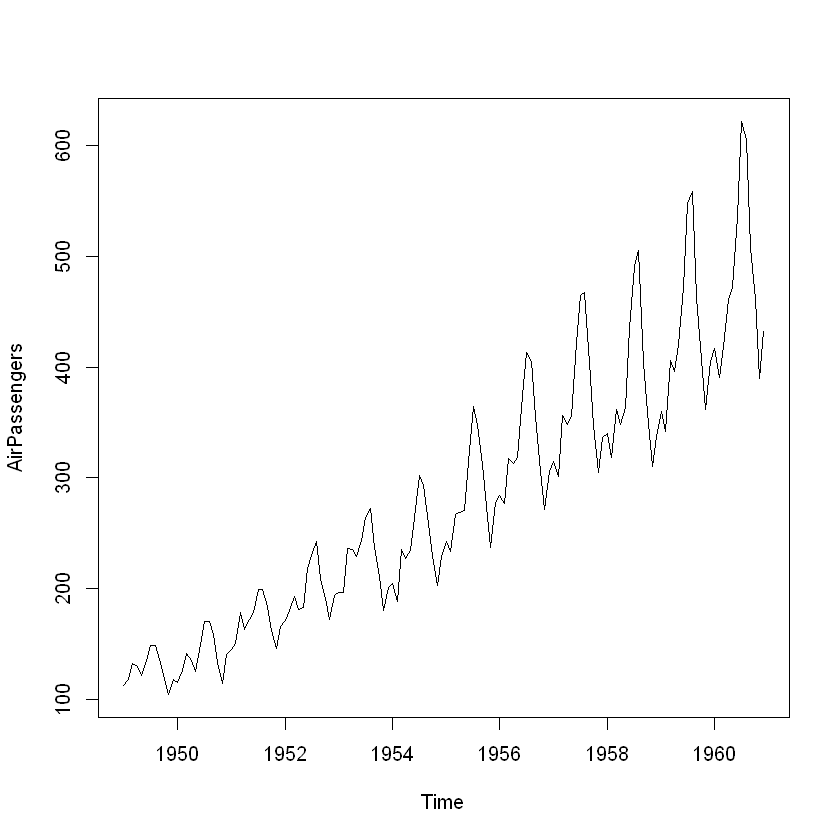

In [8]:
plot(AirPassengers)

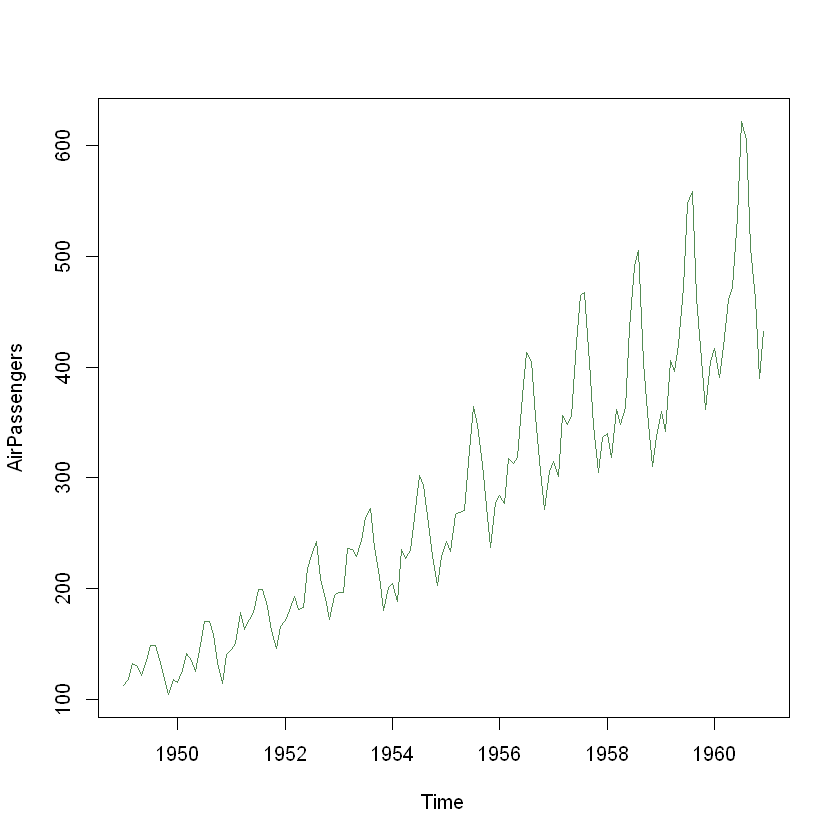

In [9]:
plot(AirPassengers,col="palegreen4")

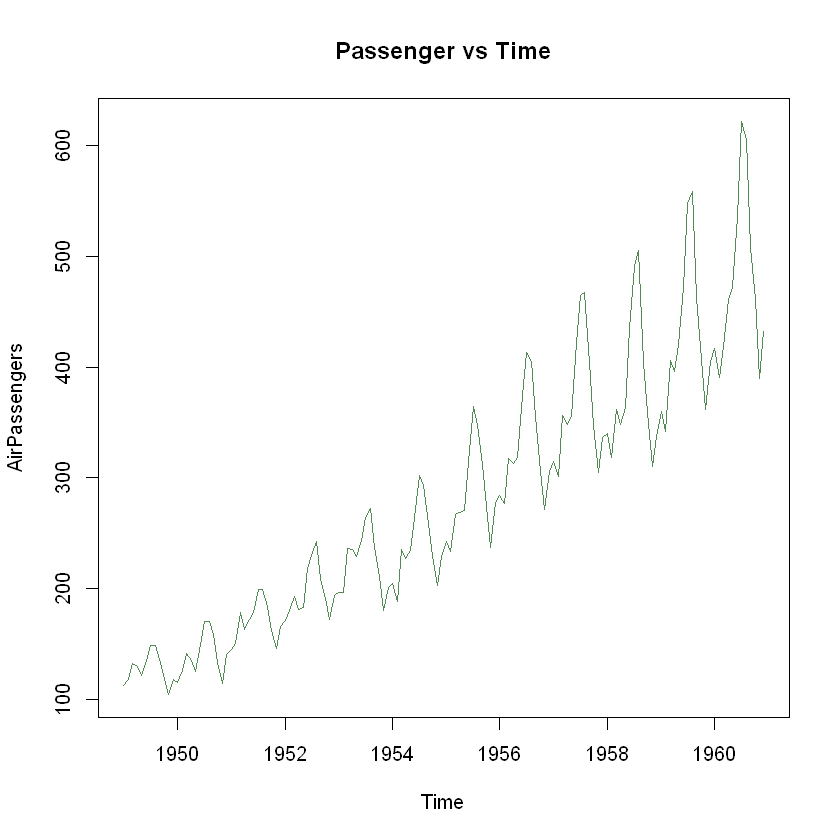

In [2]:
plot(AirPassengers,col="palegreen4",main="Passenger vs Time")

The data is not stationary because mean is not equal for every cycle and variance is not equal for every cylce

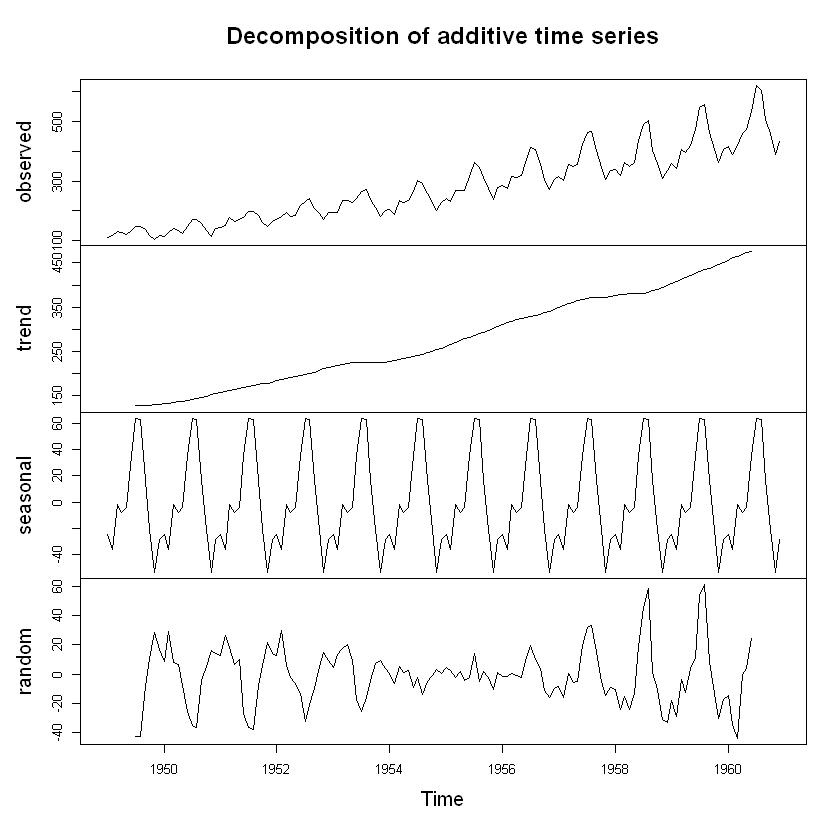

In [3]:
plot(decompose(AirPassengers))

1. First graph is the original graph
2. Second graph is showing the trend 
3. Third graph is showing the seasons
4. Fourth graph is showing the random patterns

### Let's have look at cyclical patterns

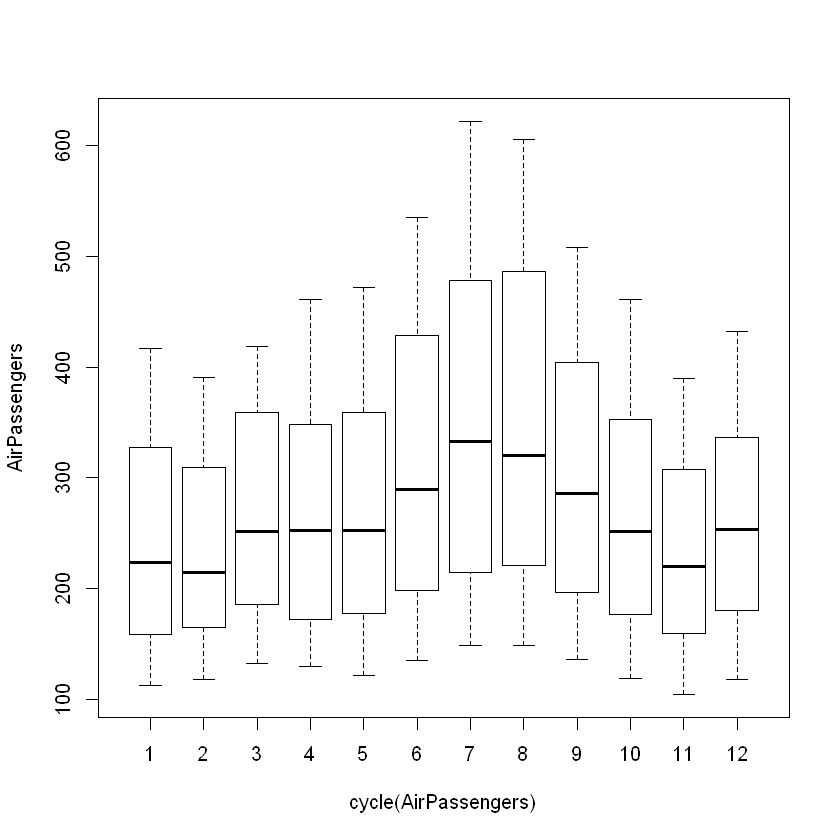

In [4]:
boxplot(AirPassengers~cycle(AirPassengers))

Most of the traffic comes in 7th and 8th months 

### This data is not stationary we have to make it stationary for this we have to do 2 things
* Variance of all trends should be equal
* We need to make the mean to be constant

#### 1. We have to make the variance equal for this we will use logrithmic function 

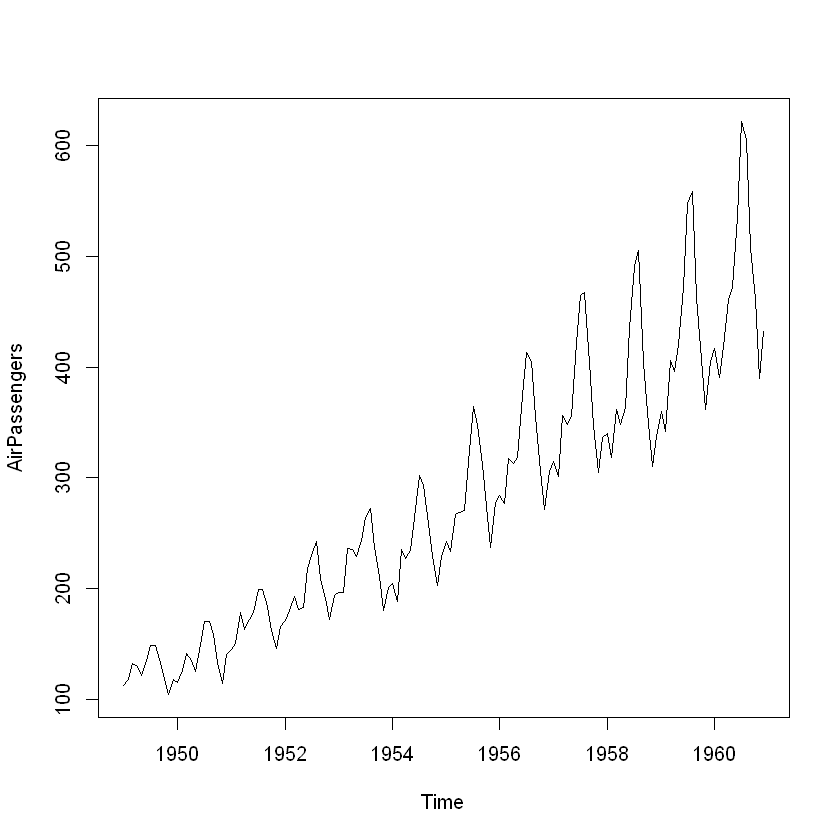

In [5]:
plot(AirPassengers)

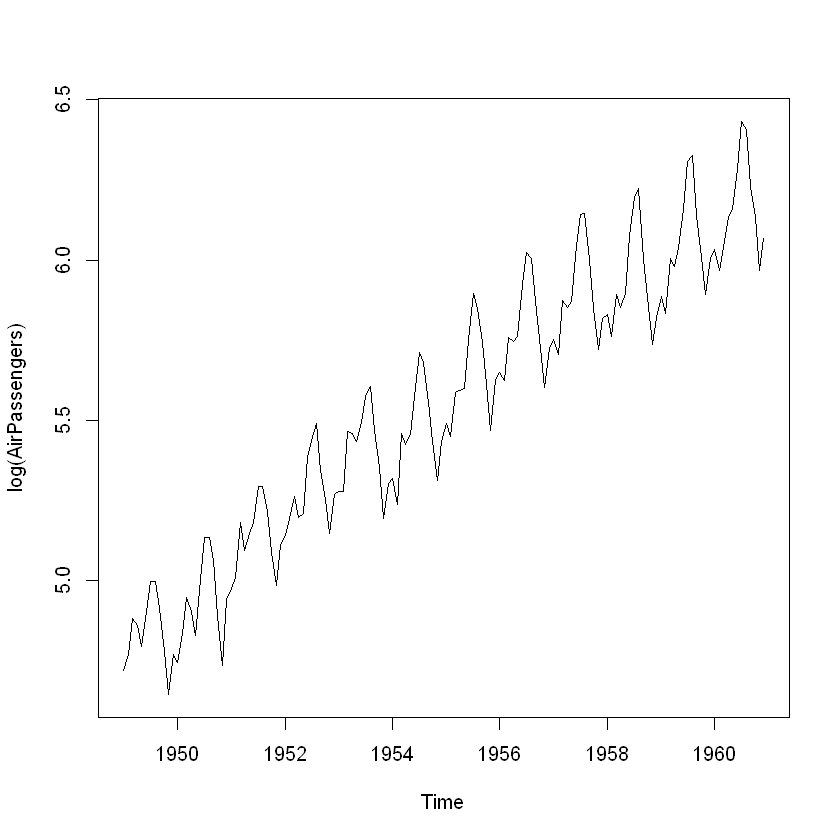

In [6]:
plot(log(AirPassengers))

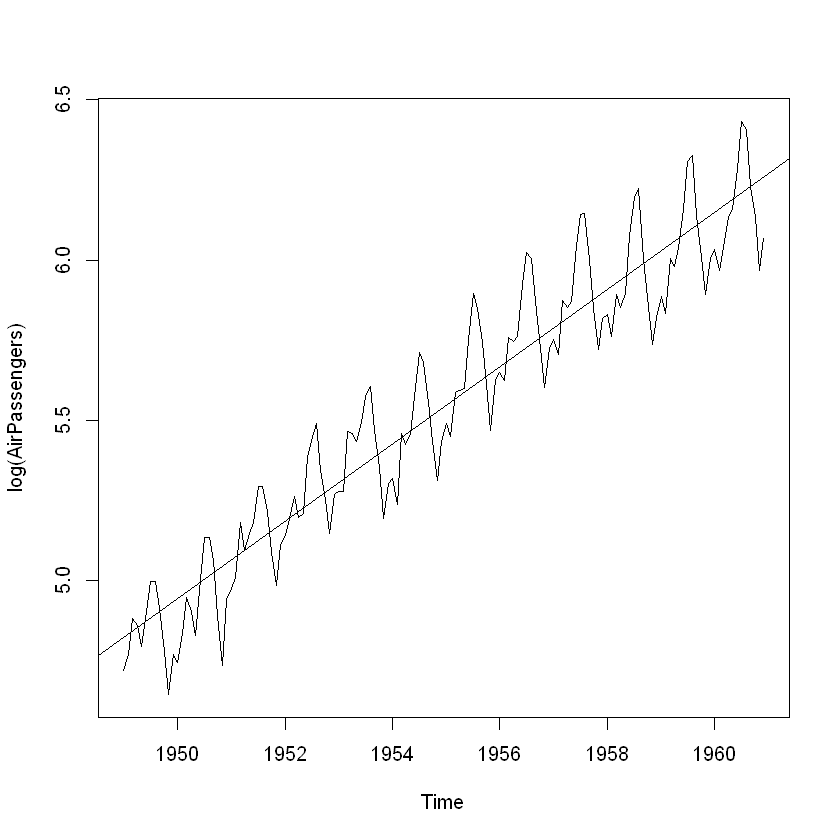

In [7]:
plot(log(AirPassengers))
abline(lm(log(AirPassengers)~time(log(AirPassengers))))

#### 2. We have to make the mean constant for this we have to use differentiation function

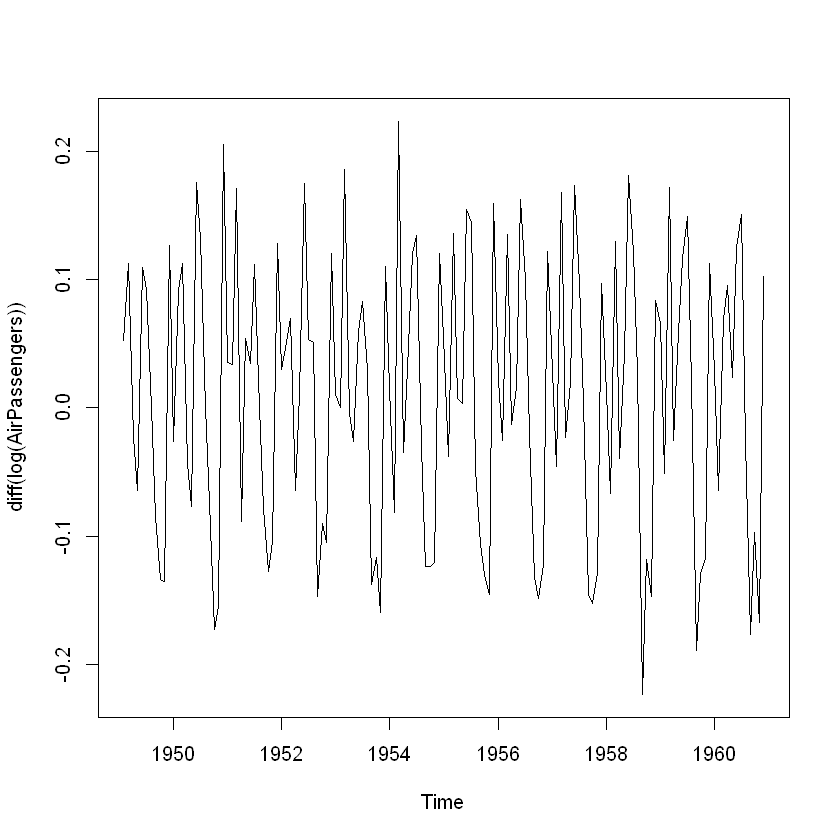

In [8]:
plot(diff(log(AirPassengers)))

By using this code our mean and variance both will be equal

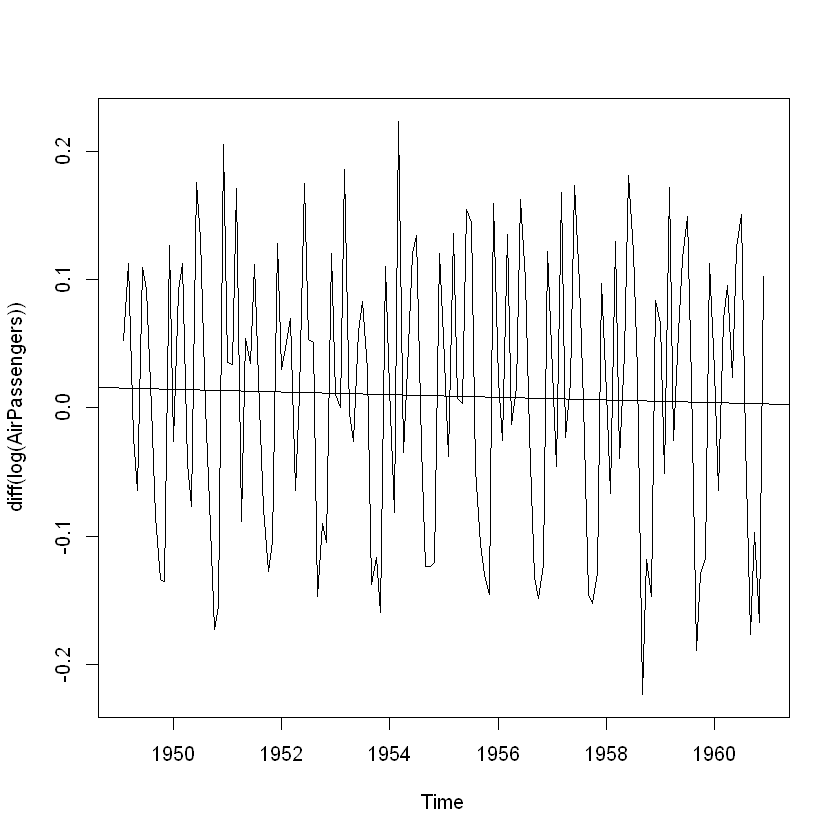

In [9]:
plot(diff(log(AirPassengers)))
abline(lm(diff(log(AirPassengers))~time(diff(log(AirPassengers)))))

### Now our data is prepared now we can Build our ARIMA Model

AR I MA <br>
p d   q

To find out the values of p and q we will use acf function 

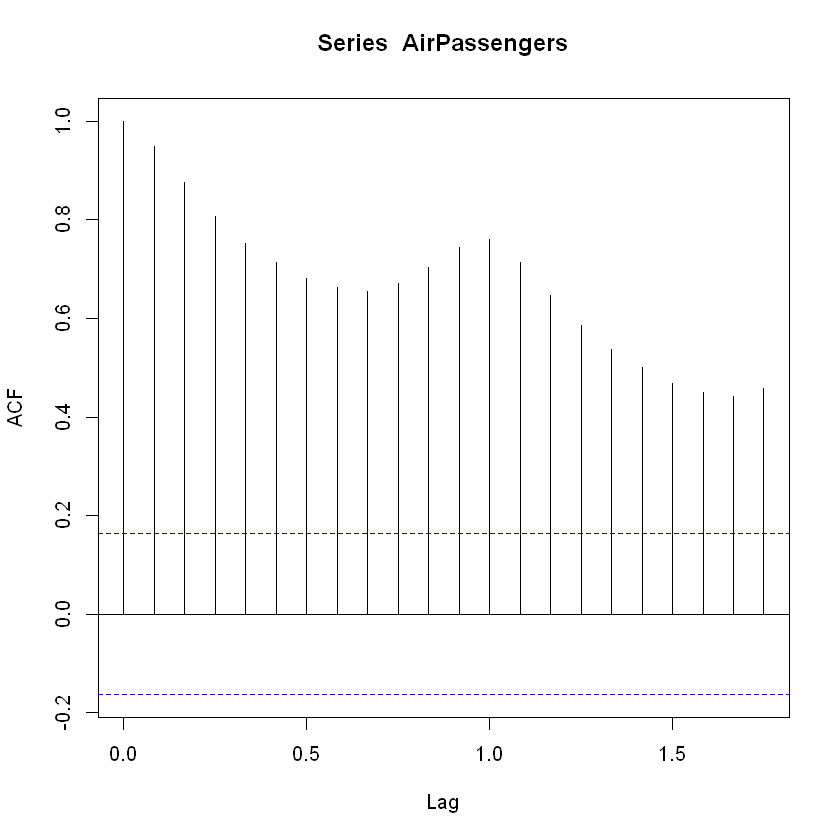

In [10]:
acf(AirPassengers)

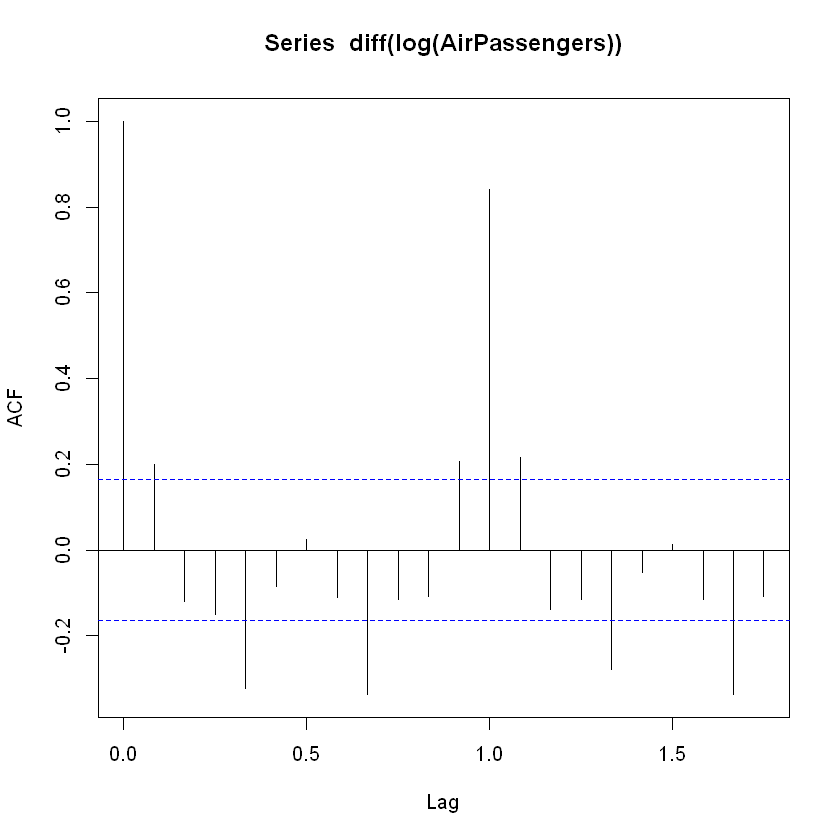

In [11]:
acf(diff(log(AirPassengers)))

To pick the value of q we will see the graph and pick the **value which comes before first inverted line** and in this graph the value of q is 1 

To get the value of p we will use pacf()<br>
#### PACF() : Partial Autocorrelation function 

to pick the value of p we will pick from graph **which is before the first inverted line**

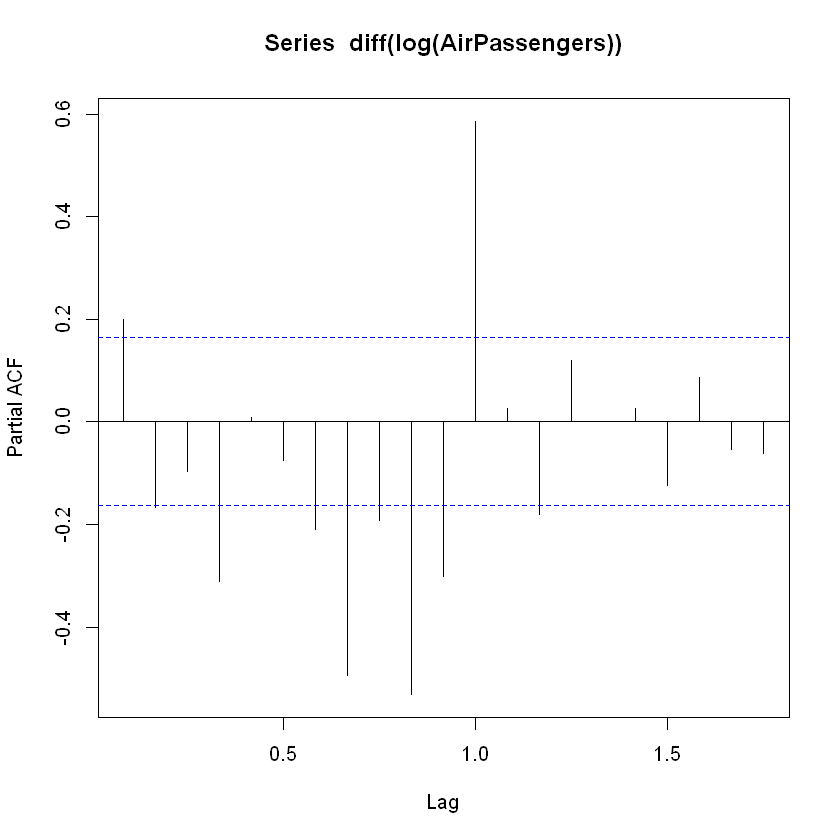

In [12]:
pacf(diff(log(AirPassengers)))

The value of p is zero (0)

Value of **d** will be the number of times we differentiate to make the means to be constant 

In [13]:
arima(log(AirPassengers),c(0,1,1),seasonal = list(order=c(0,1,0),period=12)) -> mod_time

In the above we are not differentiating again because we have passed the value of d is 1 so we don't need to differentiate it again 

In [14]:
predict(mod_time,10*12) -> pred_time

In [15]:
pred_time

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1961,6.107253,6.042874,6.112038,6.207565,6.231146,6.356434,6.507107,6.481047,6.304648,6.207565,6.040314,6.142592
1962,6.181420,6.117041,6.186204,6.281732,6.305313,6.430600,6.581274,6.555214,6.378815,6.281732,6.114480,6.216759
1963,6.255587,6.191208,6.260371,6.355898,6.379479,6.504767,6.655440,6.629380,6.452982,6.355898,6.188647,6.290926
1964,6.329753,6.265375,6.334538,6.430065,6.453646,6.578934,6.729607,6.703547,6.527149,6.430065,6.262814,6.365093
1965,6.403920,6.339542,6.408705,6.504232,6.527813,6.653101,6.803774,6.777714,6.601315,6.504232,6.336981,6.439260
1966,6.478087,6.413708,6.482872,6.578399,6.601980,6.727267,6.877941,6.851881,6.675482,6.578399,6.411147,6.513426
1967,6.552254,6.487875,6.557038,6.652566,6.676147,6.801434,6.952108,6.926048,6.749649,6.652566,6.485314,6.587593
1968,6.626421,6.562042,6.631205,6.726732,6.750313,6.875601,7.026274,7.000214,6.823816,6.726732,6.559481,6.661760
1969,6.700587,6.636209,6.705372,6.800899,6.824480,6.949768,7.100441,7.074381,6.897983,6.800899,6.633648,6.735927
1970,6.774754,6.710375,6.779539,6.875066,6.898647,7.023935,7.174608,7.148548,6.972149,6.875066,6.707815,6.810093


All these values are logrithmic values we need to raise these values to power of e

In [17]:
2.718^pred_time$pred-> pred_time

In [18]:
pred_time

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1961,448.8190,420.8379,450.9714,496.1713,508.0093,575.8081,669.4337,652.2153,546.7516,496.1713,419.7617,464.9619
1962,483.3683,453.2333,485.6864,534.3656,547.1149,620.1328,720.9655,702.4217,588.8395,534.3656,452.0742,500.7538
1963,520.5771,488.1223,523.0736,575.5001,589.2308,667.8694,776.4641,756.4928,634.1673,575.5001,486.8740,539.3009
1964,560.6501,525.6971,563.3388,619.8010,634.5887,719.2808,836.2349,814.7262,682.9843,619.8010,524.3527,580.8153
1965,603.8080,566.1642,606.7036,667.5122,683.4381,774.6497,900.6067,877.4423,735.5591,667.5122,564.7164,625.5254
1966,650.2880,609.7465,653.4065,718.8960,736.0479,834.2807,969.9337,944.9862,792.1811,718.8960,608.1872,673.6771
1967,700.3459,656.6837,703.7045,774.2353,792.7075,898.5021,1044.5974,1017.7294,853.1617,774.2353,655.0043,725.5356
1968,754.2572,707.2339,757.8744,833.8345,853.7287,967.6671,1125.0085,1096.0724,918.8365,833.8345,705.4253,781.3859
1969,812.3186,761.6755,816.2142,898.0215,919.4471,1042.1564,1211.6096,1180.4460,989.5669,898.0215,759.7277,841.5356
1970,874.8493,820.3079,879.0448,967.1495,990.2244,1122.3796,1304.8770,1271.3145,1065.7419,967.1495,818.2101,906.3154


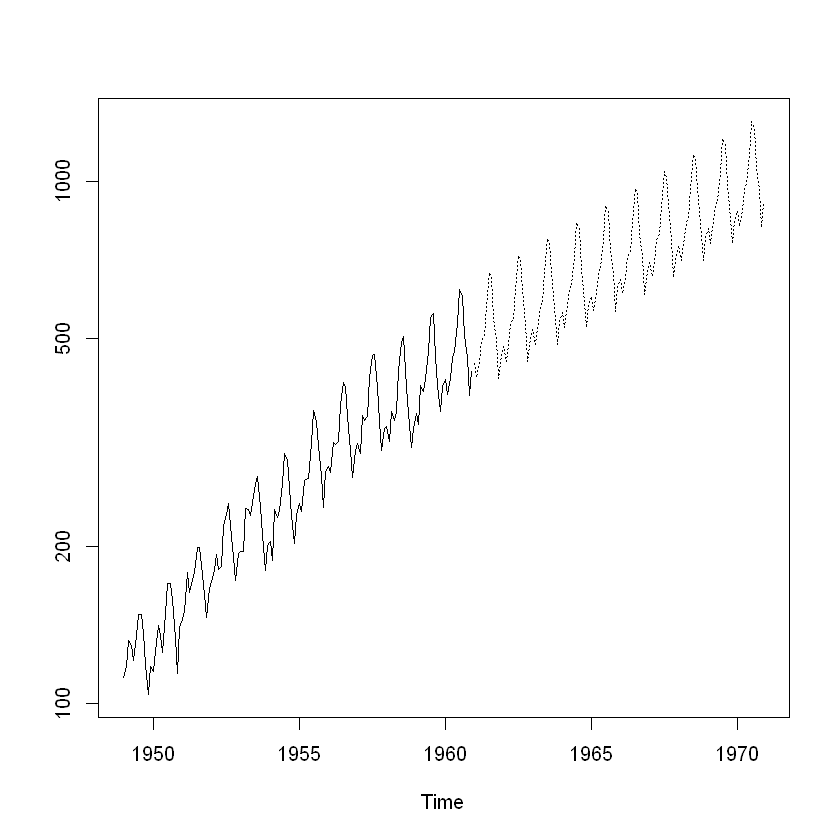

In [20]:
ts.plot(AirPassengers,pred_time,log="y",lty=c(1,3))

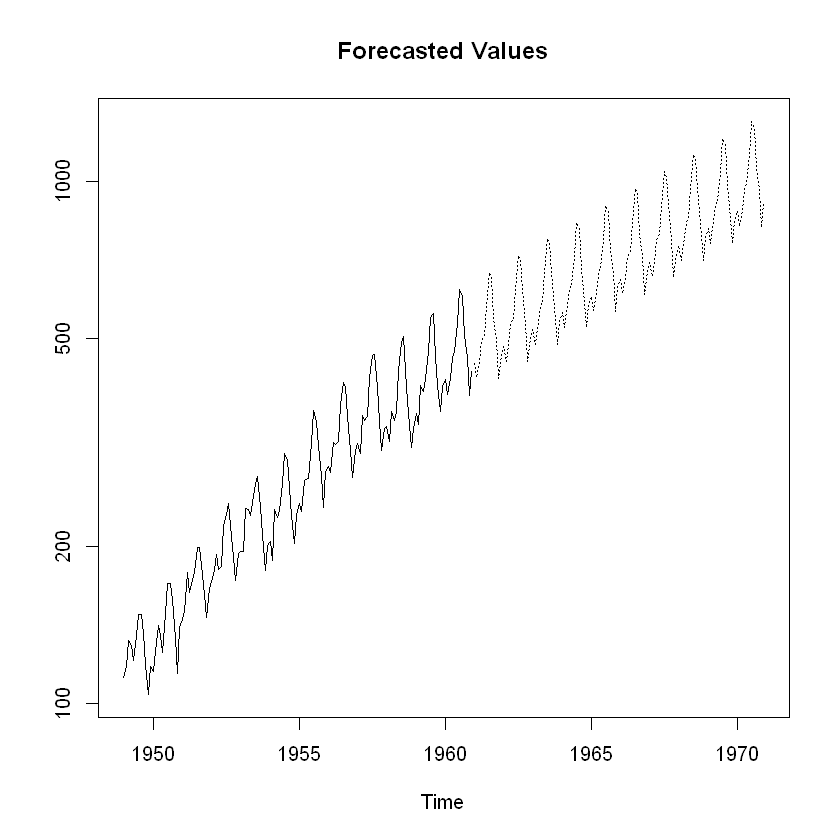

In [21]:
ts.plot(AirPassengers,pred_time,log="y",lty=c(1,3),main="Forecasted Values")